# **Task 4**
# **Stock Market Prediction using Numerical and Textual Analysis**
 Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
- Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
- Download historical stock prices URL:- https://finance.yahoo.com
- Download textual (news) data URL:- https://bit.ly/36fFPI6

In this task i need to create two model 
1. Sentimental Analysis of News Headlines
2. Stock price prediction 
3. and then create a hybrid of stock price and setimental analysis

# **`Task 4.1`** **Sentimental Analysis of News headlines**
- first part

## Load dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
# pip install TextBlob

In [4]:
data = pd.read_csv('india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


- As we can see in `headline_category` column there are some cities name, let's separate this cities name

In [5]:
data['headline_category'].value_counts()   

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
actresses                       7
sports.headline3                7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

- only take that data that contain 'city' word and store that data in new dataframe 'city_data'

In [6]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]

In [7]:
# takes only that headline_category which contain `city word`
city_data

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
3297139,20200630,city.delhi,Remove illegal signage or face penalty: NDMC
3297158,20200630,city.bengaluru,what bengaluru can do to tackle covid surge
3297161,20200630,city.bengaluru,karnataka may adopt keralas triple lockdown plan
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...


- create a new temparory dataframet which have only one column `city_name` 

In [8]:
city_split = pd.DataFrame(columns=['city_name'])

- split city word and name of city which join by '.' we need only cities name and stored it in to 'city_name' column

In [9]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [10]:
# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)

In [11]:
# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [12]:
# re-setting the index
city_data.reset_index(inplace=True)

In [13]:
# see the final data which contain city_name column
city_data.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [14]:
# there are so many cities which we can see
city_data.city_name.unique()

array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

In [15]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [16]:
# for better understanding remane the column
city_headline.rename(columns={'headline_text':'No._headline_text'},inplace=True)

In [17]:
# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='No._headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


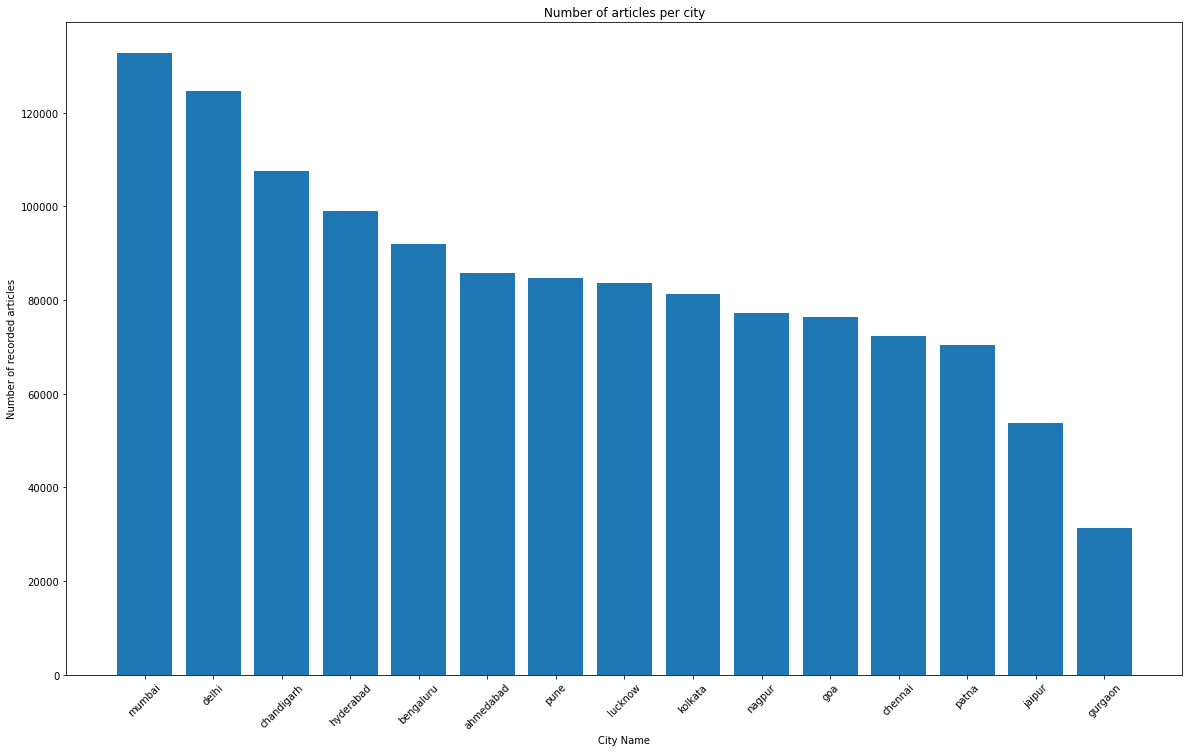

In [18]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(20,12))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['No._headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name')
plt.ylabel('Number of recorded articles')
plt.title('Number of articles per city')
plt.show()

Not so surprisingly, **Mumbai and Delhi** lead the list. Following these two cities, the decrease is fairly uniform until the sharp drop in coverage from **patana**.

### **Let's check `Year-Wise` coverage for cities**

In [19]:
city_data.dtypes   
# publish data have "int" datatype we have to change that into "datetime"

index             int64
publish_date      int64
headline_text    object
city_name        object
dtype: object

**changing datatype from int to datetime**

In [21]:
city_data['publish_date'] = pd.to_datetime(city_data['publish_date'])
city_data.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


- we are extrating only **years** from `publish_date` column

In [22]:
city_data['Year'] = city_data['publish_date'].apply(lambda x: (x.microsecond)//10)

In [23]:
# dropping unnecessary columns
city_data.drop(columns=['publish_date','index'],axis=1,inplace=True)

- final data with year-wise

In [24]:
# final result
city_data.head()

,headline_text,city_name,Year
0,Three in race for chief secy's post,bengaluru,2001
1,Druggists' stir leads to shortage of medicines,patna,2001
2,He's not so inscrutable,bengaluru,2001
3,DPCC stages Nyay rally,delhi,2001
4,Fend for yourselves; Pande tells doctors,patna,2001


- Lets consider a new column **`No_headline_text`** which contains value `one`, so we can count No. of text from each city per year
- make sure that you should always make copy of original data

In [26]:
city_data_2 = city_data.copy()
city_data_2['No_headline_text'] = 1

In [27]:
# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [28]:
city_data_2.head()

,city_name,Year,No_headline_text
0,bengaluru,2001,1
1,patna,2001,1
2,bengaluru,2001,1
3,delhi,2001,1
4,patna,2001,1


- as i already calculateed top 15 cities with high no. of headlines 
- now we consider only top `7 cities` for **year-wise coverage**

In [29]:
top_15_headline_city.head(7)

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620


we limit the graph to the `top 7 cities` which have high no. of headline: **Mumbai, Delhi, Chandigarh, Hyderabad, Bengaluru ,pune and Ahmedabad** if we try plot **all the cities**, so plot is quite messi to understand that's why we take limited cities

In [30]:
# creating new data_set for top 7 cities with year 

city_del = city_data_2[city_data_2.city_name == 'mumbai']
city_mum = city_data_2[city_data_2.city_name == 'delhi']
city_chan = city_data_2[city_data_2.city_name == 'chandigarh']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_bang = city_data_2[city_data_2.city_name == 'bengaluru']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_pune = city_data_2[city_data_2.city_name == 'pune']

- Finally we concate **all datasets** and create a final data which **contain top 7 cities year-wise coverage**

In [31]:
famous_cities = [city_del, city_mum, city_chan, city_hyd, city_bang, city_ahme, city_pune]
data_famous_cities = pd.concat(famous_cities)

In [32]:
# reset index numbers
data_famous_cities.reset_index(inplace=True)  

In [33]:
# top 7 cities
print(data_famous_cities.shape)
data_famous_cities.head()

(726075, 4)


,index,city_name,Year,No_headline_text
0,37,mumbai,2001,1
1,41,mumbai,2001,1
2,51,mumbai,2001,1
3,55,mumbai,2001,1
4,57,mumbai,2001,1


In [34]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['No_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['No_headline_text'].unstack()

- **year-wise** data which shows **which city have how many no. of headline text**

In [36]:
city_count.head()

city_name,ahmedabad,bengaluru,chandigarh,delhi,hyderabad,mumbai,pune
Year,,,,,,,
2001,3131,5739,2283,2462,4493,2465,1534
2002,5251,7170,5047,4845,6547,4366,3357
2003,4446,4382,5476,4850,5475,3762,3790
2004,2657,2759,3714,5926,2523,2822,2904
2005,1736,1714,1106,2880,1539,1556,974


- year-wise no. of headlines text

In [35]:
city_year_count.head()

Year
2001    31365
2002    53721
2003    48409
2004    34030
2005    15788
Name: No_headline_text, dtype: int64

- let's visulize **Number of articles(headline text) per year and per city**

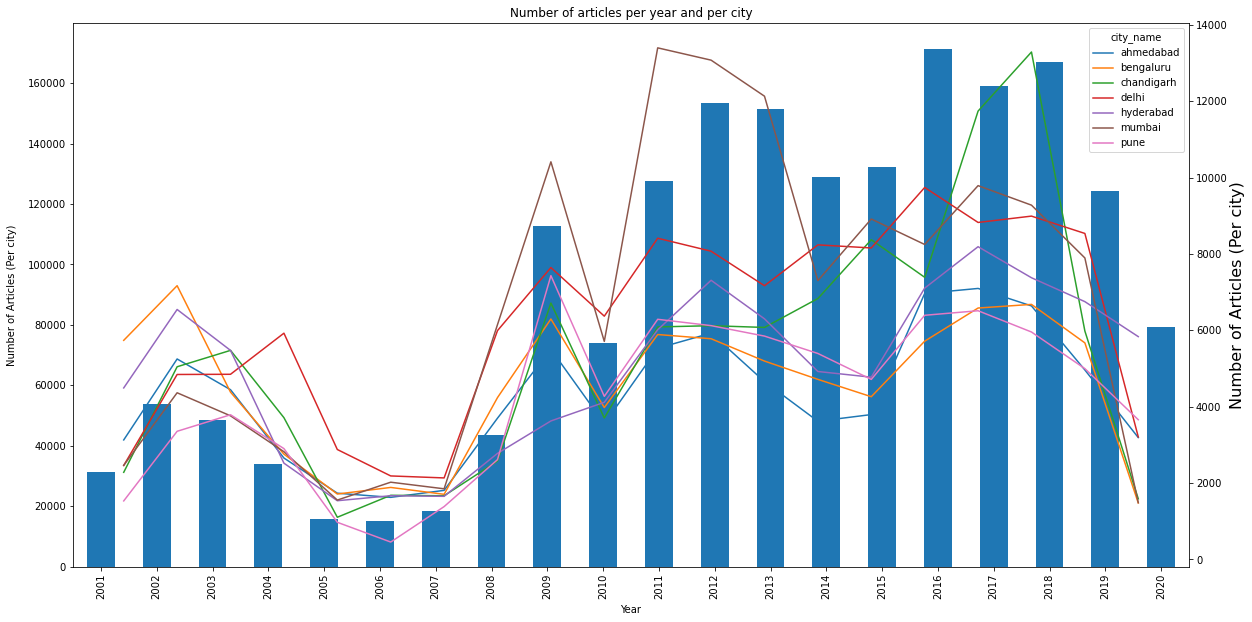

<Figure size 1440x720 with 0 Axes>

In [37]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()

The graph for the cities was **not uniform** and hence we **overlap on it a graph for the number of city-based articles by year**. This way, we can disregard the apparent non-uniformity in city-based reporting over the years.

### **Let's see which Topic that have high no. of Coverage**

In [38]:
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [39]:
# for safety always take copy of original data
new_data = data.copy()

- creating a new column `category` that contains **headline categories**

In [40]:
new_data['category']=new_data['headline_category'].str.split('.').map(lambda x : x[0])

In [41]:
new_data.head()

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,20010102,unknown,Fissures in Hurriyat over Pak visit,unknown
3,20010102,unknown,America's unwanted heading for India?,unknown
4,20010102,unknown,For bigwigs; it is destination Goa,unknown


- groupby categories and let's see **which category topic have high no. of headline**

In [42]:
top_categories = new_data.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)

- dropping some un-wanted category like **`unknown, tv, top-stories, city, citizen, edit-page etc`**

In [44]:
top_10_cat = top_categories.drop(['unknown', 'tv', 'top-stories', 'city', 'citizen', 'edit-page','top-headlines','world']).head(10)
top_10_cat

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


In [45]:
# reset index
top_10_cat.reset_index(inplace=True)

- `top_10_cat` let's see the **top 10 categories with No. of headlines** ( india, entertainment, business, sports, life-style, tech, etc)

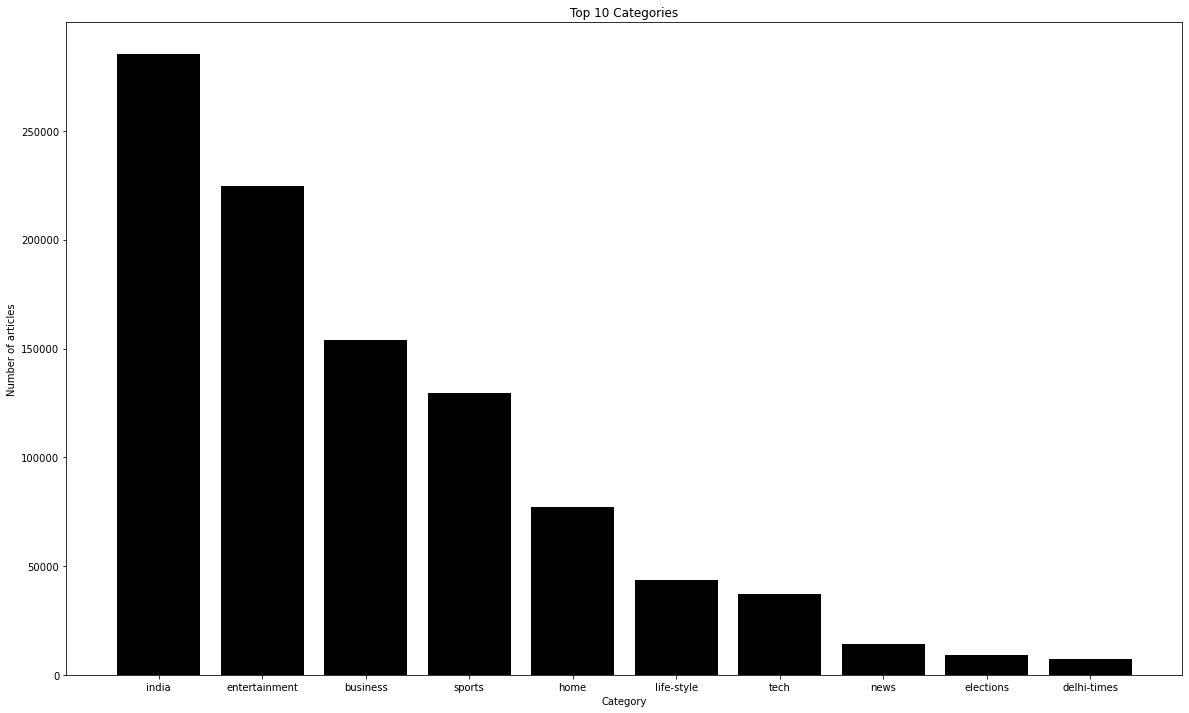

In [46]:
# visualizing top 10 categories 

plt.figure(figsize=(20,12))
plt.bar(top_10_cat.category, height=top_10_cat.headline_text,color = 'black')
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top 10 Categories')
plt.show()

**India is the most published** since the publication is based in India. Interestingly, **Entertainment is the second-most covered topic** by TOI. In fact, it's eye-opening how Bollywood is given more coverage than every other topic except for **Indian Business**.


### **Sentiment Analysis**

#### TextBlob
- TextBlob returns **polarity and subjectivity** of a sentence. Polarity lies between [-1,1], 
- Returns a value based on the polarity of the given text using TextBlob
- TextBlob library to perform sentiment analysis and analyse the polarity of the passed headline. **It returns '1' if the sentiment is `positive`, '-1' if the sentiment is `negative`, and '0' if the sentiment is `neutral`.**
- Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context. 
- Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.
- TextBlob is a python library for **Natural Language Processing (NLP)**.
- TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. 
- TextBlob is a simple library which supports complex analysis and operations on textual data.

- `For example 1`: We calculated polarity and subjectivity for **“I do not like this example at all, it is too boring”**. For this particular example, **polarity = -1**.
- `For example 2` : for the sentence **“This was a helpful example but I would prefer another one”**. It returns 0.0 for both subjectivity and polarity which is not the finest answer we’d expect. disagreement statement or **neutral**
- `For example 3` : for the sentence **"I do like this example"** It returns +1 which is **positive** value

In [47]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

- creating a columns which shows which headline have `nigative`, `positive` or `neutral` headline

In [48]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [52]:
data.head()

,publish_date,headline_category,headline_text,Result
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
3,20010102,unknown,America's unwanted heading for India?,neutral
4,20010102,unknown,For bigwigs; it is destination Goa,neutral


In [53]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})

- Let's see how many **negative headlines**, **positive headlines** and **neutral headlines** in dataset

In [54]:
final_result

,headline_text
Result,
negative,398194
neutral,2301599
positive,597379


### **Overall Sentiment Distribution**

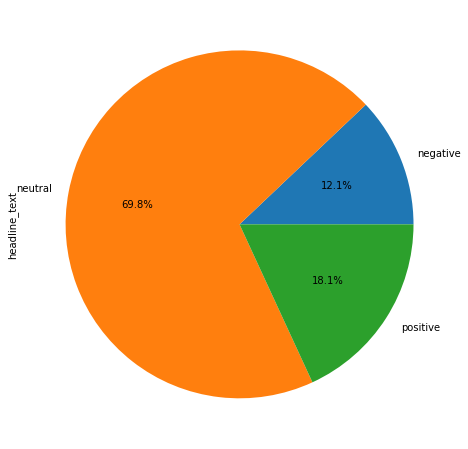

In [56]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.show()

In [57]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100

In [58]:
print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    18.11792
Name: positive, dtype: float64


Negative Headlines:  headline_text    12.076834
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    69.805245
Name: neutral, dtype: float64


In [59]:
# ***************************************************************************************************************************************
# ***************************************************************************************************************************************

# **`Task 4.2`** **Stock Price Prediction**

- performance prediction using numerical analysis of historical stock prices,

## Load dataset

In [60]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-60-c5689e8794e7>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [129]:
df = pd.read_csv("History_Stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [62]:
df.shape

(1989, 7)

In [63]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


### plot **close price**

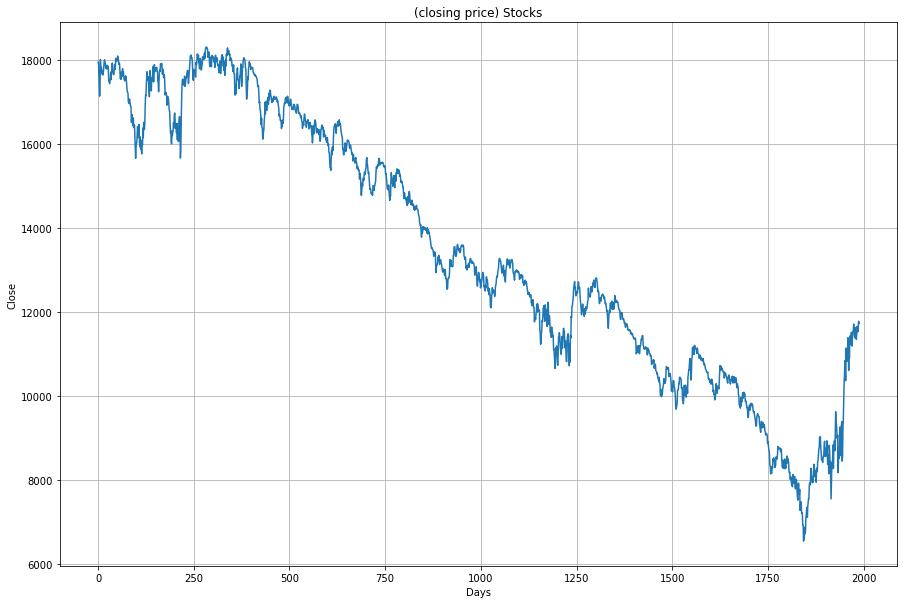

In [65]:

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Close')
plt.title('(closing price) Stocks')
plt.show()

### plot **open price**

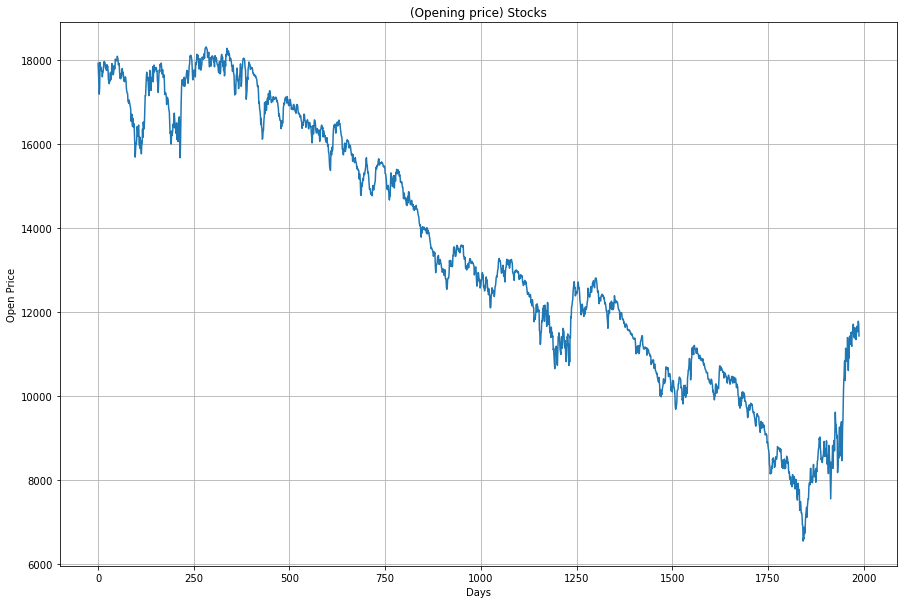

In [66]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Open'])
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('(Opening price) Stocks')
plt.show()

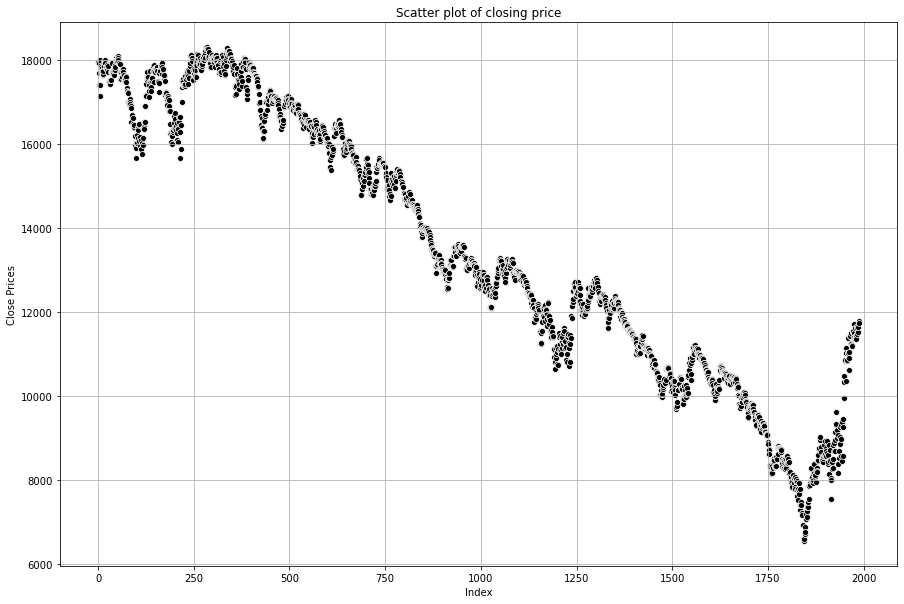

In [67]:
#plot close price using scatterplot

plt.figure(figsize=(15,10))
plt.grid(True)
sns.scatterplot(df.index,df['Close'],color='black')
plt.xlabel('Index')
plt.ylabel('Close Prices')
plt.title('Scatter plot of closing price')
plt.show()


- **`cumsum()`** function is used when we want to compute the **cumulative sum**

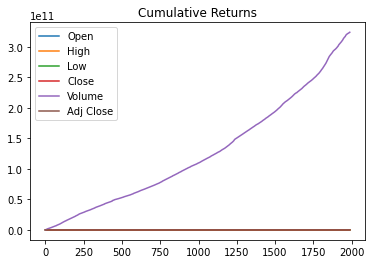

In [68]:
# Comulative Return
cumsum_data = df.cumsum()
cumsum_data.plot()
plt.title('Cumulative Returns')
plt.show()

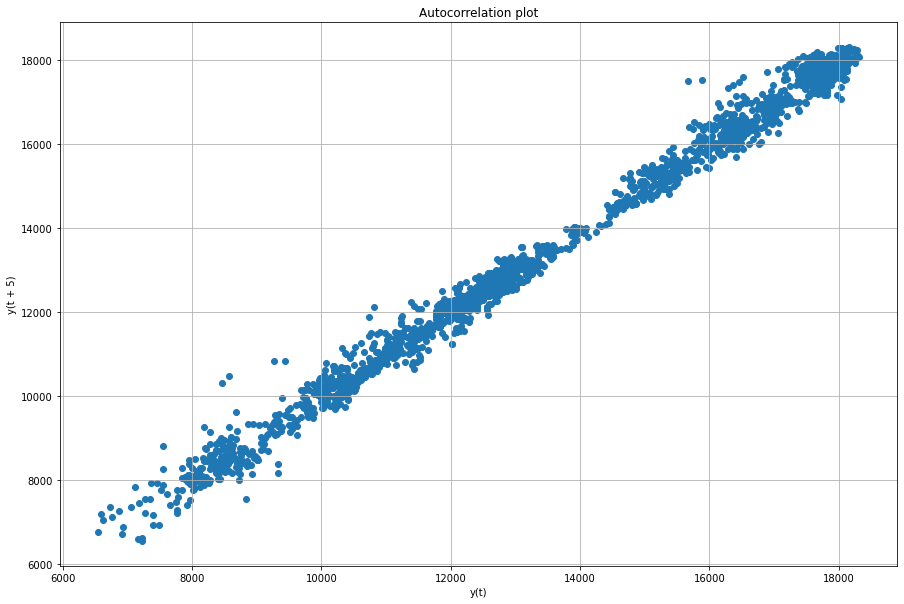

In [69]:
#plot open price

plt.figure(figsize=(15,10))
plt.grid(True)
lag_plot(df['Open'], lag=5)
plt.title('Autocorrelation plot')
plt.show()

In order to perform a time series analysis, we may need to **separate seasonality and trend from our series**. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series

<ipython-input-70-0f52144cab3b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sea_dec = seasonal_decompose(df['Open'], model='multiplicative', freq = 30)


<Figure size 432x288 with 0 Axes>

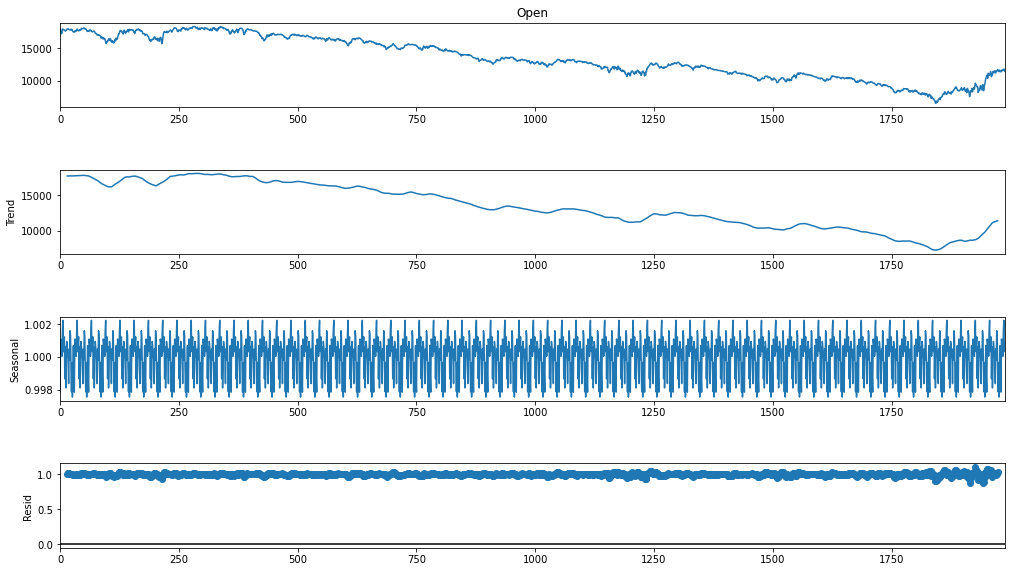

In [70]:
sea_dec = seasonal_decompose(df['Open'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = sea_dec.plot()  
fig.set_size_inches(16, 9)
plt.show()

In [71]:
df.shape

(1989, 7)

### split data into **train and test**

In [72]:
train = df[df['Date'] > '2013-04-30']
test = df[df['Date'] < '2013-04-30']

In [73]:
test.shape, train.shape

((1188, 7), (800, 7))

### For opening price
-  autoARIMA **(AutoRegressive Integrated Moving Average)** for Time Series Prediction
- we can use closeing price also

In [74]:
test_data = test['Open']
train_data = train['Open']

In [75]:
test_data.shape, train_data.shape

((1188,), (800,))

- Let's see train and test data by plot

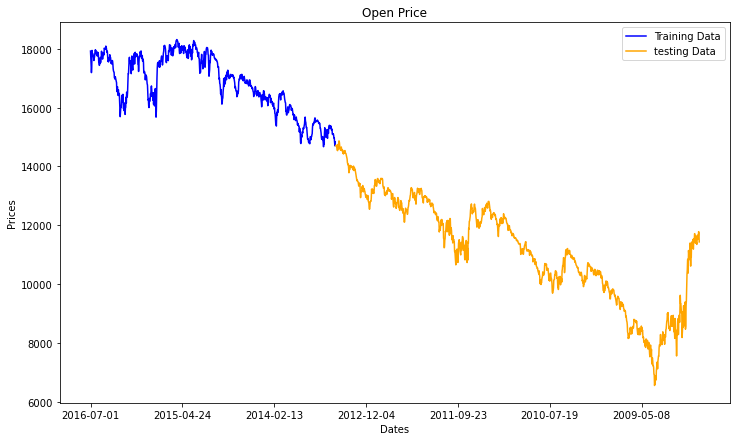

In [76]:
plt.figure(figsize=(12,7))
plt.title('Open Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'orange', label='testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.show()

### **Auto ARIMA** (AutoRegressive Integrated Moving Average):
- **Automatically discover the optimal order** for an ARIMA model. The auto_arima function seeks to **identify the most optimal parameters for an ARIMA model**, and returns a **fitted ARIMA model**.

In [77]:
from pmdarima.arima import auto_arima

In [78]:
autoARIMA_model = auto_arima(train_data, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, m=1 , seasonal=False, 
                             start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(autoARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10109.158, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10111.162, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10111.226, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10107.812, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10112.710, Time=0.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.661 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5052.906
Date:                Fri, 09 Oct 2020   AIC                          10107.812
Time:                        14:56:50   BIC                          10112.496
Sample:                             0   HQIC                         10109.611
                                - 800                                  

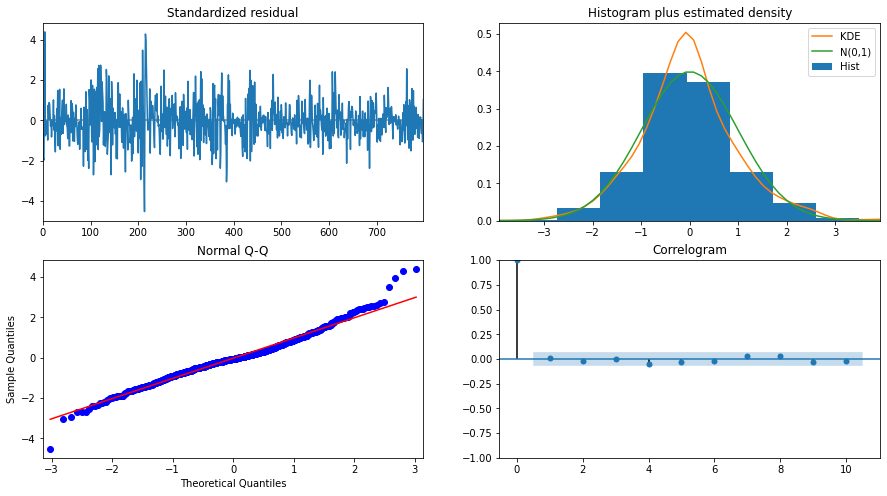

In [79]:
autoARIMA_model.plot_diagnostics(figsize=(15,8))
plt.show()

### Fitting model

In [81]:
autoARIMA_model.fit(train_data)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### Forcasting

- `n_periods`: The number of periods in the future to forecast.
- it take by default 10

In [82]:
forecast = autoARIMA_model.predict(n_periods=1188)

- Here we take n_periods 1188 because we already saparate train and test data and using train data we forecast test data so we can see how accurately model forecast and size of test data is 1188

In [83]:
forecast_data = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])

#### Let us also check the commonly used **accuracy metrics to judge forecast results**:

In [84]:
# report performance

mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)

print('Mean Squared Error      : ',mse)
print('Root Mean_Squared_Error : ',rmse)
print('Mean Absolute Error     : ',mae)


Mean Squared Error      :  16477045.50559826
Root Mean_Squared_Error :  4059.1927159964034
Mean Absolute Error     :  3638.5044885505054


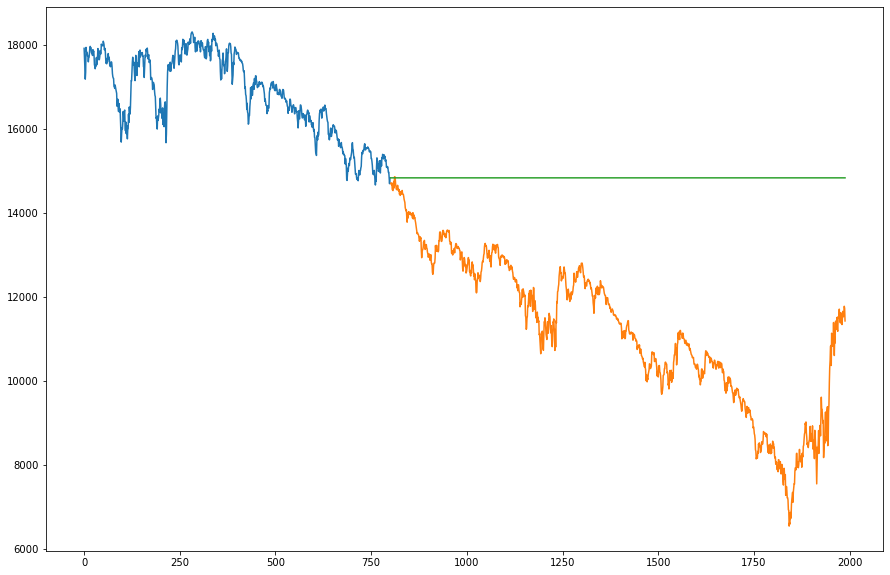

In [85]:
#visualizing
plt.figure(figsize=(15,10))

plt.plot(train_data)
plt.plot(test_data)
plt.plot(forecast_data['Prediction'])
plt.show()

In [160]:
# **************************************************************************************************************************************
# **************************************************************************************************************************************

# Task 4.3 **Create a hybrid Model**
- for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
- **`Note`** : In this Task I tried to merge the `Indian headline` and `stock price` data which I have given but unfortunately, no date matching over theirs do **I use a different dataset for Hybrid model**

- Top 1, Top2.........., Top25 are the headlines for that perticular news company
- lable indecates (dependent variable) that 1 for price increase and 0 for price decrease
- when perticular this top headline had onair then the price gets increse or decrease on a on a perticular dates
- here we need to predict when top headlines gets onair so wheather company stock price get increase or decrease
- company stock price is dependes on top headlines

## **`(A)`**. **But before that let's do some NLP on this headlines dataset**

In [130]:
news_headline = pd.read_csv('Combined_News_DJIA.csv', encoding='ISO-8859-1')
news_headline.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

- since this **headline data collected on the basis of time series** so we can not take random data for splitting, that's why we **cansider a date** and take **train data less than date** and **test data greater than that date**

In [131]:
train = news_headline[news_headline['Date'] < '20150101']
test =news_headline[news_headline['Date'] > '20141231']

In [88]:
train.shape, test.shape

((1863, 27), (378, 27))

- drop unwanted column

In [132]:
train.drop(columns=['Date'],inplace=True,axis=1)
test.drop(columns=['Date'],inplace=True,axis=1)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


- separate dependent and independent data from **train data** as `x_train` and `y_train` and similarly for **test data**

In [133]:
x_train = train.drop(columns=['Label'])
y_train = train['Label']
x_test = test.drop(columns=['Label'])
y_test = test['Label']

### **train and test data preprocessing**

- remove all the **special char or numbers** except the words that contain a-zA-Z this letters from train and test data

In [134]:
x_train.replace('[^a-zA-Z]',' ',regex = True, inplace=True)
x_test.replace('[^a-zA-Z]',' ',regex = True, inplace=True)

In [135]:
col_list = list(x_train.columns)

- **converting all independent features values to lower case for train and test data**

In [136]:
for col in col_list:
    x_train[col] = x_train[col].str.lower()
    x_test[col] = x_test[col].str.lower()


- **join the headline by rows into sentence** for `train data`

In [137]:
headlines_train = []
for row in range(0, len(x_train.index)):
    lines = ' '.join(str(k) for k in x_train.iloc[row])
    headlines_train.append(lines)

- **join the headline by rows into sentence** for `test data`

In [138]:
headlines_test = []
for row in range(0, len(x_test.index)):
    lines = ' '.join(str(k) for k in x_test.iloc[row])
    headlines_test.append(lines)

### **TF-IDF Vectorizer**

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

- `ngram_range` take min and max value, by default it will take min = 1 and max = 1
- **For example** an ngram_range of (1, 1) means only unigrams means only that words which is single
- (1, 2) means unigrams and bigrams words which appear single as well as two words Ex: uni( abl ) and bi(new york)
- (2, 2) means only bigrams. and so on..

In [140]:
tfidf = TfidfVectorizer(ngram_range=(2,2))

In [141]:
x_new_train  = tfidf.fit_transform(headlines_train)     # for train fit_transform
x_new_test  = tfidf.transform(headlines_test)           # for test transform

In [142]:
x_new_train.shape, x_new_test.shape

((1863, 403977), (378, 403977))

### **Random Forest**

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy')

In [145]:
rfc.fit(x_new_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [146]:
y_train_pred = rfc.predict(x_new_train)
y_test_pred = rfc.predict(x_new_test)

In [147]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [148]:
print("Accuracy for train data : ",accuracy_score(y_train,y_train_pred))
print("Accuracy for test data  : ",accuracy_score(y_test,y_test_pred))

Accuracy for train data :  1.0
Accuracy for test data  :  0.8386243386243386


- `Lable` indecates that `1` for **price increase** and `0` for **price decrease**

- If a companies stock will increase or decrease based on news headlines using **sentiment analysis**.This model will predict if the price of a stock will increase or decrease based on the sentiment of top news article headlines for the current day

# **`(B)`**. **Lets see Hybrid model**

- Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [113]:
import re

In [105]:
news_data = pd.read_csv('Combined_News_DJIA.csv', encoding='ISO-8859-1')
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

### Data Preprocessing

- remove all the special char or numbers except 
- the words contain a-zA-Z this letters

In [106]:
news_data.iloc[:,2:].replace('[^a-zA-Z]',' ',regex = True, inplace=True)

- Create a list of text columns from **Top 1 - Top 25**

In [107]:
col_list = list(news_data.iloc[:,2:].columns)

- **converting all features values to lower case**

In [108]:
for col in col_list:
    news_data[col] = news_data[col].str.lower()


In [111]:
# join the headline by rows into sentence for data
headlines_text = []
for row in range(0, len(news_data.index)):
    lines = ' '.join(str(k) for k in news_data.iloc[row,2:])
    headlines_text.append(lines)

- remove bracket, Operators etc. from text data

In [114]:
final_headlines_text = []
for i in range(len(headlines_text)):
    final_headlines_text.append(re.sub("b[(')]+", '', headlines_text[i] ))
    final_headlines_text[i] = re.sub('b[(")]+', '', final_headlines_text[i] )
    final_headlines_text[i] = re.sub("\'", '', final_headlines_text[i] )

In [116]:
# final_headlines_text[1]

- create a new Column `'Headline_News'` that contains this combine text data

In [117]:
news_data['Headline_News'] = final_headlines_text

In [118]:
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Headline_News
0,2008-08-08,0,"b""georgia 'downs two russian warplanes' as cou...",b'breaking: musharraf to be impeached.',b'russia today: columns of troops roll into so...,b'russian tanks are moving towards the capital...,"b""afghan children raped with 'impunity,' u.n. ...",b'150 russian tanks have entered south ossetia...,"b""breaking: georgia invades south ossetia, rus...","b""the 'enemy combatent' trials are nothing but...",...,b'al-qaeda faces islamist backlash',"b'condoleezza rice: ""the us would not act to p...",b'this is a busy day: the european union has ...,"b""georgia will withdraw 1,000 soldiers from ir...",b'why the pentagon thinks attacking iran is a ...,b'caucasus in crisis: georgia invades south os...,b'indian shoe manufactory - and again in a se...,b'visitors suffering from mental illnesses ban...,"b""no help for mexico's kidnapping surge""",georgia downs two russian warplanes as countri...
1,2008-08-11,1,b'why wont america and nato help us? if they w...,b'bush puts foot down on georgian conflict',"b""jewish georgian minister: thanks to israeli ...",b'georgian army flees in disarray as russians ...,"b""olympic opening ceremony fireworks 'faked'""",b'what were the mossad with fraudulent new zea...,b'russia angered by israeli military sale to g...,b'an american citizen living in s.ossetia blam...,...,"b'""do not believe tv, neither russian nor geor...",b'riots are still going on in montreal (canada...,b'china to overtake us as largest manufacturer',b'war in south ossetia [pics]',b'israeli physicians group condemns state tort...,b' russia has just beaten the united states ov...,b'perhaps *the* question about the georgia - r...,b'russia is so much better at war',"b""so this is what it's come to: trading sex fo...",why wont america and nato help us? if they won...
2,2008-08-12,0,b'remember that adorable 9-year-old who sang a...,"b""russia 'ends georgia operation'""","b'""if we had no sexual harassment we would hav...","b""al-qa'eda is losing support in iraq because ...",b'ceasefire in georgia: putin outmaneuvers the...,b'why microsoft and intel tried to kill the xo...,b'stratfor: the russo-georgian war and the bal...,"b""i'm trying to get a sense of this whole geor...",...,b'why russias response to georgia was right',"b'gorbachev accuses u.s. of making a ""serious ...","b'russia, georgia, and nato: cold war two'",b'remember that adorable 62-year-old who led y...,b'war in georgia: the israeli connection',b'all signs point to the us encouraging georgi...,b'christopher king argues that the us and nato...,b'america: the new mexico?',"b""bbc news | asia-pacific | extinction 'by man...",remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' u.s. refuses israel weapons to attack iran:...,"b""when the president ordered to attack tskhinv...",b' israel clears troops who killed reuters cam...,b'britain\'s policy of being tough on drugs is...,b'body of 14 year old found in trunk; latest (...,b'china has moved 10 *million* quake survivors...,"b""bush announces operation get all up in russi...",b'russian forces sink georgian ships ',...,b'us humanitarian missions soon in georgia - i...,"b""georgia's ddos came from us sources""","b'russian convoy heads into georgia, violating...",b'israeli defence minister: us against strike ...,b'gorbachev: we had no choice',b'witness: russian forces head towards tbilisi...,b' quarter of russians blame u.s. for conflict...,b'georgian president says us military will ta...,b'2006: nobel laureate aleksander solzhenitsyn...,u.s. refuses israel weapons to attack iran: r...
4,2008-08-14,1,b'all the experts admit that we should legalis...,b'war in south osetia - 89 pictures made by a ...,b'swedish wrestler ara abrahamian throws away ...,b'russia exaggerated the death toll in south o...,b'missile that killed 9 inside pakistan may ha...,"b""rushdie condemns random house's refusal to p

- **Removing column Top1 to Top 25 because we already created a column that contain combine text data from Top 1- Top 25 column**

In [123]:
unwanted_col = news_data.iloc[:,2:27].columns

In [124]:
unwanted_col

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [125]:
news_data.drop(columns=unwanted_col, inplace=True)

In [126]:
news_data.head()

,Date,Label,Headline_News
0,2008-08-08,0,georgia downs two russian warplanes as countri...
1,2008-08-11,1,why wont america and nato help us? if they won...
2,2008-08-12,0,remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...
4,2008-08-14,1,all the experts admit that we should legalise ...


## Merging news_data and Stock_price data on 'Date'


In [149]:
stock_price = df.copy()

In [150]:
stock_price.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


- Merge `stock_price` and `News_data dataset` on the basis of **Date column**

In [151]:
hybrid_data = news_data.merge(stock_price, how='inner', on='Date', left_index = True)

hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


### **Sentiment Analysis**
#### TextBlob

In [152]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [153]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['Headline_News']])

In [154]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive


In [155]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [156]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)

- Column `positive` says which statement is positive or not **{1 : positive headline, 0 : negative headline}**

In [157]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment,positive
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative,0
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive,1
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative,0
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive,1
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive,1


### VADERSentiment Analysis
- **VADER (Valence Aware Dictionary and sEntiment Reasoner)**
- is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 
- VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. 
- VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [158]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [159]:
#Create function to get the sentiment scores (using Sentiment Intensity Analyzer)
def get_senti_analysis(text):
    senti_an = SentimentIntensityAnalyzer()
    sentiment = senti_an.polarity_scores(text)
    return sentiment

- The `Compound score` is a metric that calculates the sum of all the lexicon ratings which have been normalized between **-1(most extreme negative) and +1 (most extreme positive).**

- `positive sentiment` : (compound score >= 0.05)
- `neutral sentiment` : (compound score > -0.05) and (compound score < 0.05)
- `negative sentiment` : (compound score <= -0.05)

In [160]:
# Get the sentiment scores for each day
compound = []
negative = []
neutral = []
positive = []
sia = 0
for i in range(len(hybrid_data['Headline_News'])):
    sia = get_senti_analysis(hybrid_data['Headline_News'][i])
    compound.append(sia['compound'])
    negative.append(sia['neg'])
    neutral.append(sia['neu'])
    positive.append(sia['pos'])

- Create a separate columns for `Compound`, `Negative`, `Neutral` and `Positive` Scores

In [161]:
hybrid_data['Compound'] = compound
hybrid_data['Negative'] = negative
hybrid_data['Neutral']  = neutral
hybrid_data['Positive'] = positive

In [162]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment,positive,Compound,Negative,Neutral,Positive
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative,0,-0.9983,0.212,0.729,0.059
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive,1,-0.9977,0.202,0.738,0.061
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative,0,-0.9975,0.225,0.684,0.091
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive,1,-0.9571,0.132,0.767,0.102
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive,1,-0.9644,0.148,0.758,0.094


In [383]:
hybrid_data.columns

Index(['Date', 'Label', 'Headline_News', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Adj Close', 'sentiment', 'positive', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

- **Create a list of columns which we need to keep for model creation**

In [163]:
need_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','Label']

In [164]:
new_hybrid = hybrid_data[need_col]
new_hybrid.reset_index(inplace = True)

In [165]:
new_hybrid.drop(columns=['index'],inplace=True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


- **Final Hybrid Dataset**

In [166]:
new_hybrid.head()

,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,11432.089844,11759.959961,11388.040039,212830000,-0.9983,0.212,0.729,0.059,0
1,11729.669922,11867.110352,11675.530273,183190000,-0.9977,0.202,0.738,0.061,1
2,11781.700195,11782.349609,11601.519531,173590000,-0.9975,0.225,0.684,0.091,0
3,11632.809570,11633.780273,11453.339844,182550000,-0.9571,0.132,0.767,0.102,0
4,11532.070312,11718.280273,11450.889648,159790000,-0.9644,0.148,0.758,0.094,1


#### **Separate Dependent and Independent varaibles**

In [168]:
X = new_hybrid.drop('Label', axis=1)    # independent variables

y = new_hybrid['Label']                # dependent variable

#### **Split data into train and test**

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### 1. **Logistic Regression**

In [171]:
from sklearn.linear_model import LogisticRegression

In [176]:
logit = LogisticRegression()

logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test,y_logit_pred)

0.5100502512562815

## 2. **Random forest**

In [177]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.5904522613065326

## 3. **Decision Tree**

In [178]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_score(y_test,y_dt_pred)

0.5954773869346733

## 4. **SVC (Support Vector Classifier)**

In [179]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_svc_pred = svc.predict(x_test)
accuracy_score(y_test,y_svc_pred)

0.5175879396984925

## 5. **Linear Discriminant Analysis**
- LDA is closely related to `analysis of variance` (ANOVA) and regression analysis.
- `Linear Discriminant Analysis` **or** `Normal Discriminant Analysis` **or** `Discriminant Function Analysis` is a dimensionality reduction technique which is commonly used for the **supervised classification problems**. 
- It is used for **modeling differences in groups** i.e. **separating two or more classes**. 
- It is used to project the features in **higher dimension space into a lower dimension space**.

In [180]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test,y_lda_pred)

0.8366834170854272

#### Model Accuracy

In [182]:
print("Logistic Regression Model Accuracy :- ",accuracy_score(y_test,y_logit_pred))
print("Random forest Model Accuracy       :- ",accuracy_score(y_test,y_rf_pred))
print("Decision Tree Model Accuracy       :- ",accuracy_score(y_test,y_dt_pred))
print("SVC Model Accuracy                 :- ",accuracy_score(y_test,y_svc_pred))
print("Linear Discriminant Model Accuracy :- ",accuracy_score(y_test,y_lda_pred))

Logistic Regression Model Accuracy :-  0.5100502512562815
Random forest Model Accuracy       :-  0.5904522613065326
Decision Tree Model Accuracy       :-  0.5954773869346733
SVC Model Accuracy                 :-  0.5175879396984925
Linear Discriminant Model Accuracy :-  0.8366834170854272


### **`Conclusion:-`**  
- Here we can clearly see that instead of LDA (Linear Discriminant Analysis) all other models gives low accuracy, LDA has 83% accuracy which means it works better than other 4 Algorithms.

- `Lable` indecates that `1` for **price increase** and `0` for **price decrease**

- If a companies stock will increase or decrease based on news headlines using **sentiment analysis**.This model will predict if the price of a stock will increase or decrease based on the sentiment of top news article headlines for the current day.